In [218]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
from mpl_toolkits.mplot3d import Axes3D

print(os.getcwd())

C:\Users\u0166657\Workspace\Diplo-datos\repositorio\DiploDataScienceG7\Mauri\TP3


In [186]:
df = pd.read_csv('./preprocessed_dataset.csv', index_col=0)
new_df = pd.DataFrame()

In [187]:
new_df['total_payment_value'] = df.groupby(["customer_id"])["payment_value"].apply(sum)

In [188]:
new_df['total_buys'] = df.groupby('customer_id')['customer_id'].apply(pd.Series.count)

In [189]:
new_df['prefered_payment_type'] = df.groupby('customer_id')['payment_type'].apply(lambda x:x.mode()[0])

In [190]:
new_df['prefered_payment_installments'] = df.groupby('customer_id')['payment_installments'].apply(lambda x:x.mode()[0])

In [191]:
new_df['mean_review_score'] = df.groupby('customer_id')['review_score'].apply(pd.Series.mean)

In [192]:
new_df['mean_products_photos_qty'] = df.groupby('customer_id')['product_photos_qty'].apply(pd.Series.mean)

In [193]:
new_df['n_different_bought_products'] =  df.groupby('customer_id')['payment_type'].apply(pd.Series.nunique)

In [194]:
new_df['mean_products_volume'] = df.groupby('customer_id')['product_volume'].apply(pd.Series.mean)

In [195]:
new_df['mean_products_weight_g'] = df.groupby('customer_id')['product_weight_g'].apply(pd.Series.mean)

In [196]:
new_df.to_csv('./new_df.csv')

In [197]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english', 'Month_order',
       'order_process_time', 'order_delivery_time', 'order_accuracy_time',
       'order_approv

In [198]:
df.product_category_name_english.value_counts(normalize=True)

bed_bath_table               0.103123
health_beauty                0.085893
sports_leisure               0.077338
furniture_decor              0.075316
computers_accessories        0.069945
                               ...   
arts_and_craftmanship        0.000207
la_cuisine                   0.000138
cds_dvds_musicals            0.000120
fashion_childrens_clothes    0.000069
security_and_services        0.000017
Name: product_category_name_english, Length: 71, dtype: float64

In [201]:
#customer_state(4 categorias, primeras 3 mas otros)
new_df['mean_customer_state'] = df.groupby('customer_id')['customer_state'].apply(lambda x:x.mode()[0])

customer_state_list=['SP','RJ','MG']
def customer_state_truncate(x):
    if x not in customer_state_list :
        return 'OTROS'
    else:
        return x


new_df['mean_customer_state'] = new_df['mean_customer_state'].apply(lambda row: customer_state_truncate(row))

In [202]:
#seller_state(4 categorias, primeras 3 mas otros)
new_df['mean_seller_state'] = df.groupby('customer_id')['seller_state'].apply(lambda x:x.mode()[0])

seller_state_list=['SP','PR','MG']
def seller_state_truncate(x):
    if x not in seller_state_list :
        return 'OTROS'
    else:
        return x

new_df['mean_seller_state'] = new_df['mean_seller_state'].apply(lambda row: seller_state_truncate(row))

In [210]:
#mean_order_process_time
new_df['mean_order_process_time'] = df.groupby('customer_id')['order_process_time'].apply(lambda x:x.mode()[0])
new_df['mean_order_process_time'] = pd.to_timedelta(new_df['mean_order_process_time'],unit='S')
new_df['mean_order_process_days'] = new_df['mean_order_process_time'].dt.days 
new_df['mean_order_process_hour_minute'] = new_df['mean_order_process_time'].dt.components.hours.astype(str) + new_df['mean_order_process_time'].dt.components.minutes.astype(str)

In [206]:
#mean_order_delivery_time
new_df['mean_order_delivery_time'] = df.groupby('customer_id')['order_delivery_time'].apply(lambda x:x.mode()[0])
new_df['mean_order_delivery_time'] = pd.to_timedelta(new_df['mean_order_delivery_time'],unit='S')
new_df['mean_order_delivery_days'] = new_df['mean_order_delivery_time'].dt.days
new_df['mean_order_delivery_hour_minute'] = new_df['mean_order_delivery_time'].dt.components.hours + new_df['mean_order_delivery_time'].dt.components.minutes

In [211]:
#mean_order_accuracy_time
new_df['mean_order_accuracy_time'] = df.groupby('customer_id')['order_accuracy_time'].apply(lambda x:x.mode()[0])
new_df['mean_order_accuracy_time'] = pd.to_timedelta(new_df['mean_order_accuracy_time'],unit='S')
new_df['mean_order_accuracy_days'] = new_df['mean_order_accuracy_time'].dt.days
new_df['mean_order_accuracy_hour_minute'] = new_df['mean_order_accuracy_time'].dt.components.hours + new_df['mean_order_accuracy_time'].dt.components.minutes

In [203]:
#mean_order_approved_time'
new_df['mean_order_approved_time'] = df.groupby('customer_id')['order_approved_time'].apply(lambda x:x.mode()[0])
new_df['mean_order_approved_time'] = pd.to_timedelta(new_df['mean_order_approved_time'],unit='S')
new_df['mean_order_approved_days'] = new_df['mean_order_approved_time'].dt.days
new_df['mean_order_approved_hour_minute'] = new_df['mean_order_approved_time'].dt.components.hours + new_df['mean_order_approved_time'].dt.components.minutes

In [208]:
new_df.columns

Index(['total_payment_value', 'total_buys', 'prefered_payment_type',
       'prefered_payment_installments', 'mean_review_score',
       'mean_products_photos_qty', 'n_different_bought_products',
       'mean_products_volume', 'mean_products_weight_g', 'mean_customer_state',
       'mean_seller_state', 'mean_order_approved_time',
       'mean_order_approved_days', 'mean_order_approved_hour_minute',
       'mean_order_delivery_time', 'mean_order_delivery_days',
       'mean_order_delivery_hour_minute', 'mean_order_process_time',
       'mean_order_process_days', 'mean_order_process_hour_minute'],
      dtype='object')

In [223]:
new_df.drop(['mean_order_process_time','mean_order_delivery_time','mean_order_accuracy_time', 'mean_order_approved_time'], axis='columns', inplace=True)

### Tratamiento de Outliers

In [212]:
new_df.describe()

,total_payment_value,total_buys,prefered_payment_installments,mean_review_score,mean_products_photos_qty,n_different_bought_products,mean_products_volume,mean_products_weight_g,mean_order_approved_time,mean_order_approved_days,mean_order_approved_hour_minute,mean_order_delivery_time,mean_order_delivery_days,mean_order_delivery_hour_minute,mean_order_process_time,mean_order_process_days,mean_order_accuracy_time,mean_order_accuracy_days,mean_order_accuracy_hour_minute
count,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000,96944.000000,96944,96944.000000,96944.000000,96944,96944.000000,96944.000000,96944,96944.000000,96944,96944.000000,96944.000000
mean,207.138952,1.198537,2.903883,4.093551,2.249135,1.022549,15256.788955,2108.019929,0 days 10:16:54.027376,0.264823,24.366180,9 days 07:03:40.485935,8.850512,39.821072,12 days 11:35:17.612142,12.015463,11 days 04:37:46.664027,10.888606,35.626836
std,626.445194,0.751232,2.704329,1.339103,1.739502,0.148462,23386.142592,3758.330376,0 days 21:12:44.286130,0.762466,18.361404,8 days 16:20:01.553706,8.665194,19.200122,9 days 10:38:48.393433,9.450100,10 days 02:47:07.270252,10.113564,17.810162
min,9.590000,1.000000,0.000000,1.000000,1.000000,1.000000,168.000000,0.000000,0 days 00:00:00,0.000000,0.000000,-17 days +21:41:31,-17.000000,0.000000,0 days 12:48:07,0.000000,-189 days +00:35:53,-189.000000,0.000000
25%,63.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2816.000000,300.000000,0 days 00:12:54,0.000000,12.000000,4 days 03:53:26.750000,4.000000,25.000000,6 days 20:02:39,6.000000,6 days 09:43:33.250000,6.000000,21.000000
50%,110.000000,1.000000,2.000000,5.000000,2.000000,1.000000,6480.000000,700.000000,0 days 00:20:33,0.000000,17.000000,7 days 01:35:06,7.000000,39.000000,10 days 03:29:21,10.000000,11 days 23:45:29,11.000000,35.000000
75%,197.020000,1.000000,4.000000,5.000000,3.000000,1.000000,18414.000000,1825.000000,0 days 14:26:52.250000,0.000000,33.000000,11 days 22:30:00.250000,11.000000,55.000000,15 days 10:17:42.750000,15.000000,16 days 06:16:17.750000,16.000000,50.000000
max,109312.640000,63.000000,24.000000,5.000000,20.000000,2.000000,296208.000000,40425.000000,60 days 10:51:59,60.000000,82.000000,205 days 04:35:00,205.000000,82.000000,209 days 15:05:12,209.000000,146 days 00:23:13,146.000000,82.000000


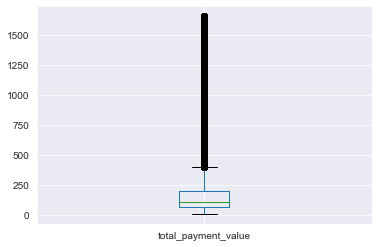

In [213]:
new_df.loc[new_df['total_payment_value']>new_df['total_payment_value'].quantile(0.99),'total_payment_value'] = new_df['total_payment_value'].quantile(0.99)
new_df.boxplot(['total_payment_value'])

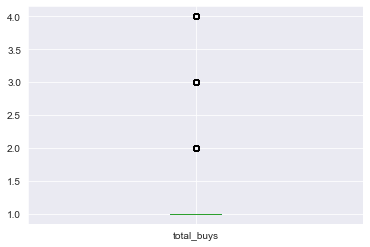

In [226]:
new_df.loc[new_df['total_buys']>new_df['total_buys'].quantile(0.99),'total_buys'] = new_df['total_buys'].quantile(0.99)
new_df.boxplot(['total_buys'])

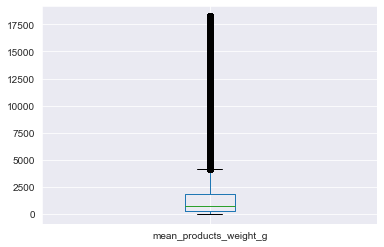

In [227]:
new_df.loc[new_df['mean_products_weight_g']>new_df['mean_products_weight_g'].quantile(0.99),'mean_products_weight_g'] = new_df['mean_products_weight_g'].quantile(0.99)
new_df.boxplot(['mean_products_weight_g'])


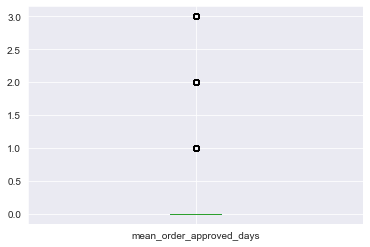

In [228]:
new_df.loc[new_df['mean_order_approved_days']>new_df['mean_order_approved_days'].quantile(0.99),'mean_order_approved_days'] = new_df['mean_order_approved_days'].quantile(0.99)
new_df.boxplot(['mean_order_approved_days'])

### Falta tener el customer_id en la tabla y ver que features vamos a utilizar para clusterizar

### Buscamos K

In [ ]:
Nc = range(1, 21) # pruebo con 1 cluster, 2 clusters... 20 clusters
# creo los kmeans
kmeans = [None] * 20
for i in Nc:
    kmeans[i-1] = KMeans(n_clusters=i)

kmeans

In [ ]:
# ejecuto kmeans con cada uno de los clusters

score = [None] * 20

for i in range(len(kmeans)):
    score[i] = (kmeans[i].fit(X).inertia_)  #score(X))
    
# score nos da 0 si los elementos son muy parecidos, o el "opuesto" al objetivo de kmeans (minimizar distancia)
    

In [ ]:
plt.plot(Nc,score)
plt.xlabel('Cantidad de clusters')
plt.ylabel('Score')
plt.title('Elbow Curve (Curva codo)')
plt.xticks(Nc)
plt.show()